<a href="https://colab.research.google.com/github/Deepakkarki24/Online-Retail-Customer-Segmentation/blob/main/Individual_Colab_(Customer_Segmentation)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Name : Online Retail Customer Segmentation

## **Project Type - Unsupervised Machine Learning**


# **Project Summary -**

Before going into the definition of customer segmentation, let us take a look at how online retail works and how the associated data would look like. When a person goes into a retail store and purchases a few items, the following basic data points should be generated:

• Customer Name/Customer ID

• Address/Contact number of the customer (Demographic information)

• Invoice number

• Product name and product code

• Quantity

• Unit Price

• Date and time of the transaction

• Coupon Code (if applicable)

• Discount amount (if applicable)

Now that we have developed a basic idea about how retail data looks like, let us think about how a company should think in order to make effective marketing policies.

One axiom frequently used in business and economics is the Pareto principle. This can be applied to understanding the revenue stream of a company as well.

***As per the Pareto Principle, 80% of outcomes result from 20% of all the causes of any given event.***

In business terms, we can say that 20% of customers contribute 80% share of the total revenue of a company. That’s why finding this set of people is important.

### **Understanding Customer Segmentation**

• Customer segmentation is the process of separating a company's customers into groups based on their shared characteristics. The purpose of customer segmentation is to determine how to relate to customers in each category in order to optimize each customer's value to the company. 

• Customer segmentation has the ability to help marketers reach out to each customer in the most efficient way possible. A customer segmentation study uses the huge quantity of data available on customers (and future customers) to identify distinct groups of consumers with a high degree of accuracy based on demographic, behavioural, and other characteristics.

• Insights from customer segmentation are used to develop tailor-made marketing campaigns and for designing overall marketing strategy and planning.

• To conclude, we saw how we can segment our customer depending on our business requirements. You can perform RFM for your entire customer base, or just a subset. For example, you may first segment customers based on a geographical area or other demographics, and then by RFM for historical, transaction-based behaviour segments.

• RFM analysis can help in answering many questions with respect to their customers and this can help companies to make marketing strategies for their customers, retaining their slipping customers and providing recommendations to their customer based on their interest. We used the K-means algorithm to segment our customer in various clusters having similar similarity. I think K-means did a pretty good job here.



##**Project/Colab Overview**

• Feature summary 

• Insights from our Dataset

• Analysis on unique values in each column

• Analysis on top Country

• Analysis on top products

• Analysis on  cancelled order

• Distribution

• Analysis on Customer data

• Analysis of  Negative Quantities

• RFM MODEL 

• Recency 

• Frequency 

• Monetary

• QQ Plot on R-M-F

• Outlier treatment (IQR Process)

• Modelling 

• K-Means clustering

• Silhouette  Analysis 

• Elbow method

• Box plot on R-F-M

• Hierarchical clustering

• 3-D visualization on R-F-M

• Challenges

• Solution to Business Objective

• Conclusion 

# **GitHub Link -**

[link text](https://github.com/Deepakkarki24/Online-Retail-Customer-Segmentation)

## <b> Problem Statement </b>

In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

##**Business problem Overview**


The goal of this job is to use cluster analysis to identify important consumer categories in a transnational data set that encompasses all transactions for a UK-based and registered non-store internet retailer over a specific time period.

# **General Guidelines** : -  


1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]

# ***Let's Begin !***




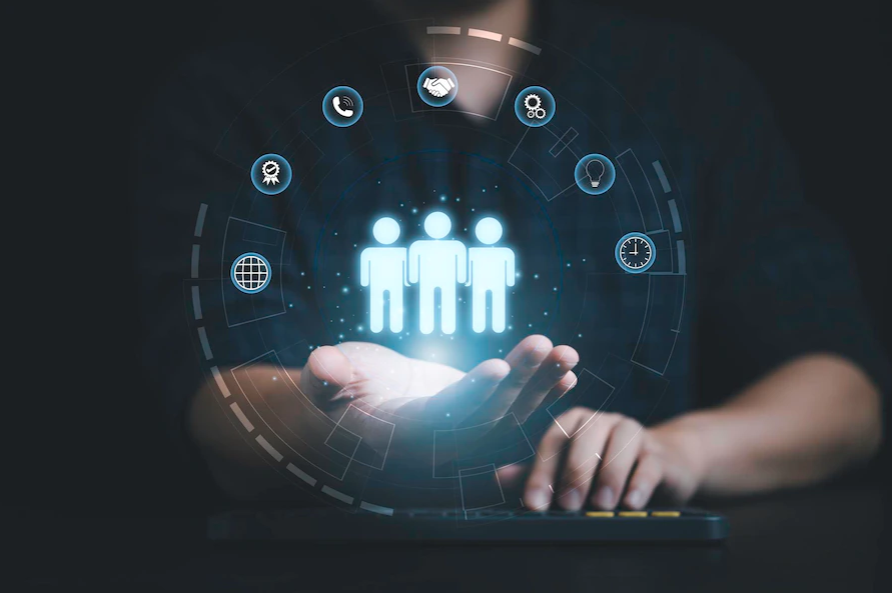

## **1. Know Your Data**

# **Importing Libraries**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import datetime
import scipy
import scipy.stats as stat
import math
import sklearn

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

## Libraries for Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree



# **Importing Dataset**


In [ ]:
# Mounting Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading Dataset
df = pd.read_excel('/content/drive/MyDrive/ALMABETTER/CAPSTONE PROJECTS/CAPSTONE PROJECT 4 - Customer Segmentation/Online Retail.xlsx')

In [ ]:
# First Look Of Dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# Last Look Of Dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Dataset Rows & Columns
df.shape

(541909, 8)

In [ ]:
# Dataset Describe
df.describe(include="all")

<ipython-input-9-885de598b301>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [ ]:
# Dataset types
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
# Checking Null Values in the Dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Checking Unique Values In The Dataset
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [ ]:
# Checking Unique Attributes In Column Country
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

### **What did you know about your dataset?**


• Total Rows : 541909, Total Column: 8 

• A transactional data set with transactions occurring between 1st December   2010 and 9th December 2011 for a UK-based online retailer.
 Many customers of the company are wholesalers. 

• There are 37 unique countries in columns attribute

• There are a lot of null values in Description & Customer ID.



## **2. Understanding Your Variables**

In [ ]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

<ipython-input-15-1fb2dbb7a3f1>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


## **Variable Description**

• InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 

• StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 

• Description: Product (item) name. Nominal. 

• Quantity: The quantities of each product (item) per transaction. Numeric. 

• InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated. 

• UnitPrice: Unit price. Numeric, Product price per unit in sterling.

• CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

#**3. Exploratory Data Analysis (EDA)**




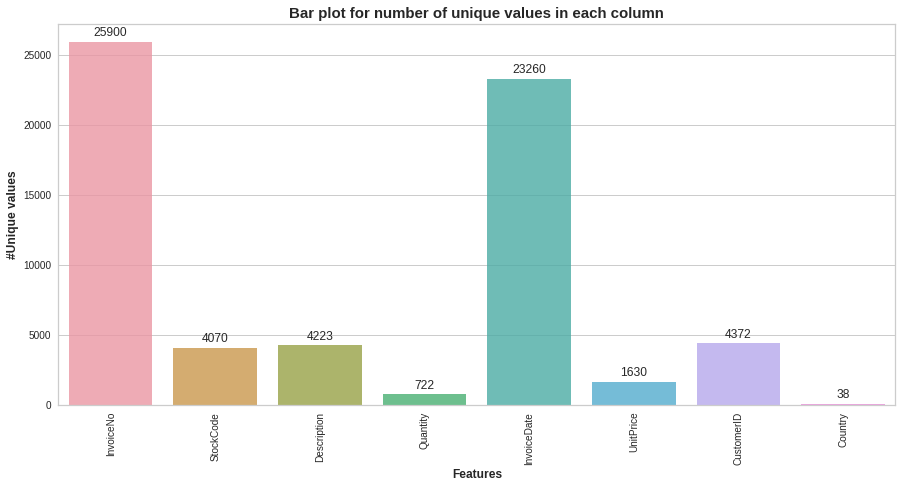

In [ ]:
# Plotting bar plot for number of unique values in each column
unique_df=pd.DataFrame()
unique_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

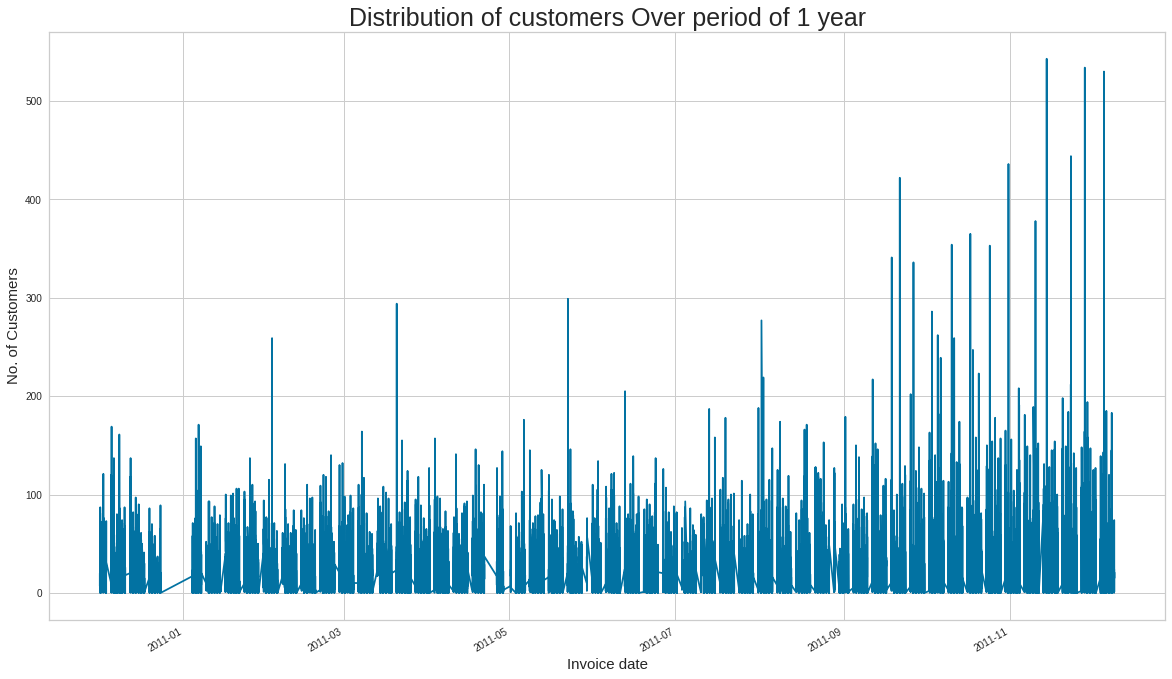

In [ ]:
## customer distribution in 1 year time period
plt.figure(figsize=(20,12))
customer_distribution = df.groupby('InvoiceDate').count()['CustomerID'].plot()

## Set title and x, y labels
plt.title('Distribution of customers Over period of 1 year', size=25)
plt.xlabel('Invoice date', size=15)
plt.ylabel('No. of Customers', size=15)
plt.show()

# **Checking & Dropping Duplicates**


In [ ]:
#Checking duplicate values
df.duplicated().value_counts()

False    536641
True       5268
dtype: int64

In [ ]:
# Dropping Duplicates
df.drop_duplicates(keep = False, inplace=True)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(531762, 8)

### **After dropping duplicates we can see that 5268 values got dropped which is nearly (about ~1%) of the original dataset.**




# **Countries**


**Here, we will quickly look at the countries from which orders were made:**

In [ ]:
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('No. of countries in the dataframe: {}'.format(len(countries)))

No. of countries in the dataframe: 37


# **Different country count on the basis of Invoice no.**


In [ ]:
# Apply groupby function on country and Invoice No.
country_count = df.groupby('Country')['InvoiceNo'].count().reset_index()

In [ ]:
country_count.head()

,Country,InvoiceNo
0,Australia,1257
1,Austria,401
2,Bahrain,19
3,Belgium,2069
4,Brazil,32


In [ ]:
## From country_count variable finding top 10 countries
Top_10_country = country_count.sort_values('InvoiceNo', ascending=False, ignore_index=True).head(10)
Top_10_country

,Country,InvoiceNo
0,United Kingdom,485509
1,Germany,9465
2,France,8525
3,EIRE,8172
4,Spain,2523
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1986
8,Portugal,1502
9,Australia,1257


**Since the data, taken from the UCI Machine Learning repository describes the data to based on transactions for a UK-based and registered non-store online retail, let us check the percentage of orders from each country in the data.**


In [ ]:
## Adding country percentage column to top 10 countries data frame
Top_10_country['Country_percent']= Top_10_country['InvoiceNo']*100/df['InvoiceNo'].count()
Top_10_country

,Country,InvoiceNo,Country_percent
0,United Kingdom,485509,91.301936
1,Germany,9465,1.779932
2,France,8525,1.603161
3,EIRE,8172,1.536778
4,Spain,2523,0.474460
5,Netherlands,2371,0.445876
6,Belgium,2069,0.389084
7,Switzerland,1986,0.373475
8,Portugal,1502,0.282457
9,Australia,1257,0.236384


### **Plotting graph for top 10 countries on the basis of percentage count.**


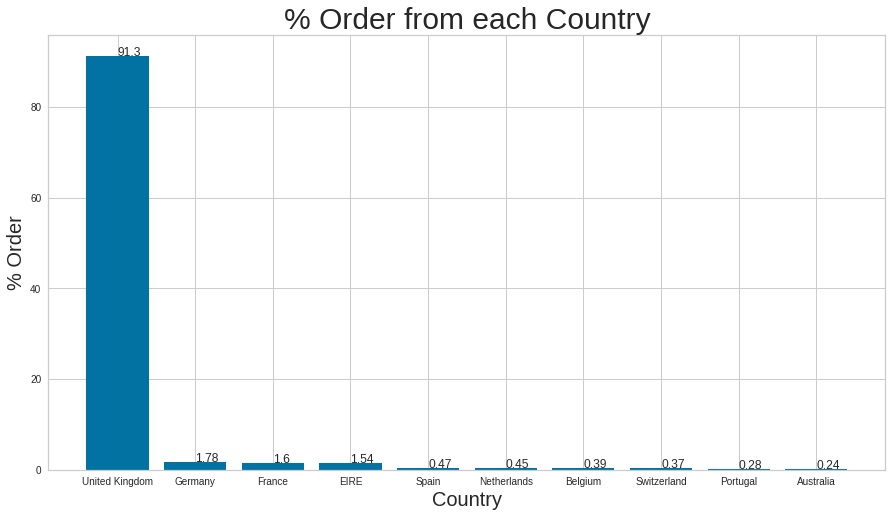

In [ ]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=Top_10_country['Country']
y=Top_10_country['Country_percent']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("% Order", size=20)
plt.title("% Order from each Country", size=30)

## Showing the plot
plt.show()

## **We see that the dataset is largely dominated by orders made from the UK which is about 91.3%.**

**The above graph shows the percentage of orders from the top 10 countries, sorted by the number of orders. This shows that more than 90% of orders are coming from United Kingdom and no other country even makes up 3% of the orders in the data.**

**Therefore, for the purpose of this analysis, I will be taking data corresponding to orders from the United Kingdom. This subset will be made in one of the next steps and will be mentioned as required.**


# **Checking for canceled orders**

**Given in the attribute info of data descripton**

**InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.** 

**Let us now look at the number of cancelled orders in the dataset.**


In [ ]:
# Dataset Head
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# String to be searched in start of string 
search ="C"
  
# boolean series returned with False at place of NaN
series = df["InvoiceNo"].str.startswith(search, na=False)
  
# displaying filtered dataframe
cancel_order = df[series]

cancel_order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
# Checking the shape of the cancelled order dataset
cancel_order.shape

(9219, 8)

In [ ]:
# Checking the percentage of no. of orders cancelled 
cancel_percentage = cancel_order['InvoiceNo'].count()*100/df['InvoiceNo'].count()
cancel_percentage

1.7336703261985624

### This shows that **9219 (approx 1.72%)** were such orders which were **canceled**.


## **Now checking the top 10 countries from where the orders were canceled.**


In [ ]:
cancel = cancel_order.groupby('Country')['InvoiceNo'].count().reset_index()

In [ ]:
cancel_top10 = cancel.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_top10

,Country,InvoiceNo
0,United Kingdom,7791
1,Germany,453
2,EIRE,300
3,France,147
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


### **Now plotting a graph for these top 10 countries on the basis of no. of canceled orders.**


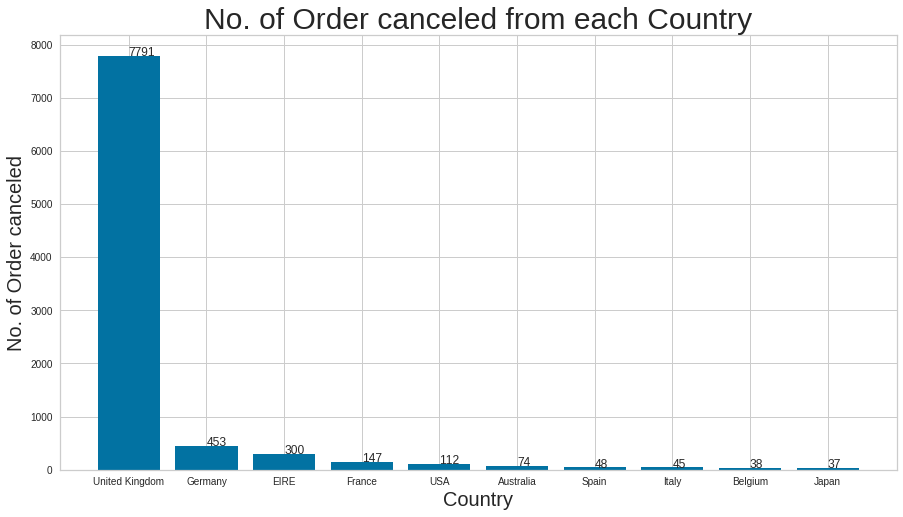

In [ ]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=cancel_top10['Country']
y=cancel_top10['InvoiceNo']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("No. of Order canceled", size=20)
plt.title("No. of Order canceled from each Country", size=30)

## Showing the plot
plt.show()

##**Number of orders canceled : 9219/ 536641  (1.72%)**



In [ ]:
df = df[~df.InvoiceNo.str.contains("C", na=False)]

In [ ]:
df.shape

(522543, 8)

# **Customer's Data**


In [ ]:
customer_df = df.copy()

In [ ]:
customer_df['amount'] = customer_df.Quantity*customer_df.UnitPrice

In [ ]:
customer_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
#fig = plt.figure(figsize=(25, 7))
PercentSales = customer_df.groupby(["CustomerID"]).amount.sum().sort_values(ascending = False).iloc[:20].reset_index()
PercentSales.head(10)


,CustomerID,amount
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194230.79
3,16446.0,168472.50
4,14911.0,143597.28
5,12415.0,124914.53
6,14156.0,117040.53
7,17511.0,91062.38
8,16029.0,80676.84
9,12346.0,77183.60


<Axes: xlabel='CustomerID', ylabel='amount'>

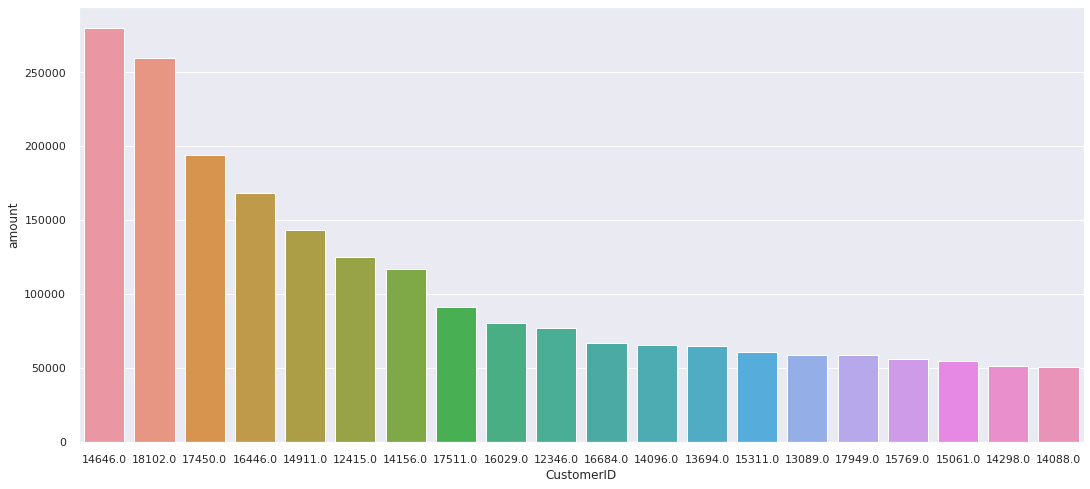

In [ ]:
sns.set(rc={'figure.figsize':(18,8)})


sns.barplot(x="CustomerID", y="amount", data=PercentSales, order=PercentSales['CustomerID'])

**The above graph shows the relationship between customerID - X-Axis and Amount - Y-Axis.**

**As most Amount is spent by customerID (14646.0) which is more than 250000 followed by customerID (18102.0) which is also more than 250000 and so on.**


# **Top 10 Products**


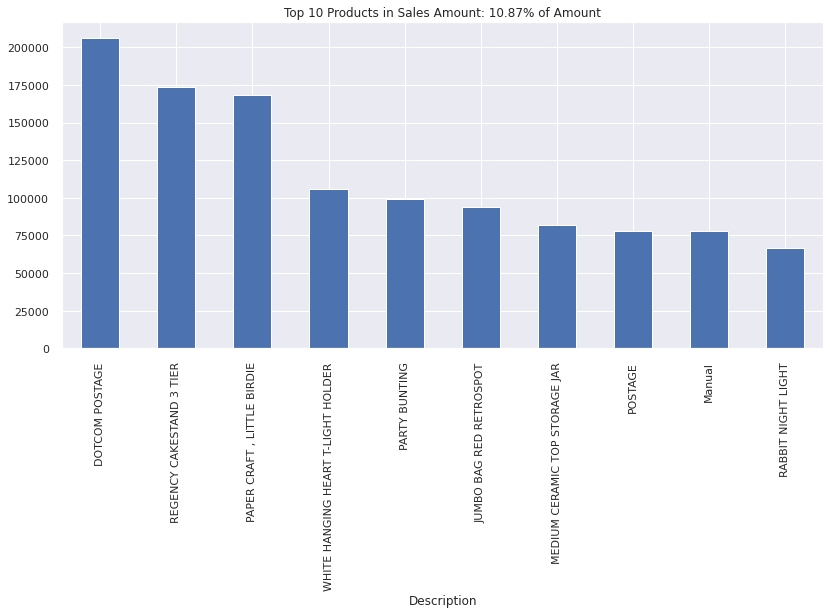

In [ ]:
# Plotting a graph for top 10 products
AmoutSum = customer_df.groupby(["Description"]).amount.sum().sort_values(ascending = False)
inv = customer_df[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending = False)

fig = plt.figure(figsize=(30, 6))
f1 = fig.add_subplot(121)
Top10 = list(AmoutSum[:10].index)
PercentSales =  np.round((AmoutSum[Top10].sum()/AmoutSum.sum()) * 100, 2)

g = AmoutSum[Top10].\
    plot(kind='bar', title='Top 10 Products in Sales Amount: {:3.2f}% of Amount'.\
                       format(PercentSales))






##**Checking orders with negative quantities that were not canceled.**


In [ ]:
df_negative_qty = df[df['Quantity'] < 0]
df_negative_qty.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom


**As we can see from the above figure, these cases are the ones where 
CustomerID values are NaNs. These cases were also removed from the data.**








In [ ]:
df_negative_qty.shape

(1336, 8)

**All the canceled orders contain negative quantities (since it is a cancellation) and hence were removed from the data.**

**Finally, I ran a check to confirm whether there were any orders with negative quantities in the orders that were not canceled. There were 1336 such cases.**


In [ ]:
# Checking for NaN Values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134620
Country             0
dtype: int64

**Customer ID has 134620 Nan Values. And Description has 1454 Nan Values. Drop the Nan values to make data more cleaned.**


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(387923, 8)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,387923.000000,387923.00000,387923.000000
mean,13.278617,3.13463,15281.620997
std,182.690206,22.37660,1713.954340
min,1.000000,0.00000,12346.000000
25%,2.000000,1.25000,13941.000000
50%,6.000000,1.95000,15144.000000
75%,12.000000,3.75000,16788.000000
max,80995.000000,8142.75000,18287.000000


## **INSIGHTS FROM OUR EDA**

•The data in this set comes from the United Kingdom. 

• There are 541909 rows and 8 columns in our data collection. 

• 'InvoiceNo', 'Stock Code', 'Description', and 'Country' are four categorical features. 

• There are missing data in the Description and CustomerID columns, and null values have been removed. 

• There are duplicate values, thus they've been removed. 

• 'InvoiceDate' is a Datetime[ns] feature.

• Duplicate were removed & after dropping duplicates we can see that 5268 values got dropped which is nearly about ~1% of the original dataset.

• After checking for the canceled orders in the dataset  we  found that 9219 (approx 1.72%) were such orders which was canceled.

 •There is 1336 rows having negative quantity and also order were not canceled.
 Also we see that, these cases are the ones where CustomerID values are NaNs. These cases were also removed from the data.
 
• Customer ID has 134995 Nan Values & Description has 1454 Nan Values. Drop the Nan values to make data more cleaned. 

# **4. Create The RFM model (Recency, Frequency & Monetary value)**

 Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors:

Recency: How recently a customer has made a purchase.

Frequency: How often a customer makes a purchase.

Monetary Value: How much money a customer spends on

##**Performing RFM Segmentation and RFM Analysis, Step by Step**


The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. ... The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M).


###**Recency**

To create a Recency feature variable, we need to decide the reference date for analysis and we wil define the reference date as one day before the last transaction.

In [ ]:
ref_date = df.InvoiceDate.max()

#timedelta function returns to total number of seconds
ref_date = ref_date + datetime.timedelta(days=1)

print(df.InvoiceDate.max(), df.InvoiceDate.min())
ref_date

2011-12-09 12:50:00 2010-12-01 08:26:00


Timestamp('2011-12-10 12:50:00')

We will construct a reference variable as number of days before the reference date when a customer last made a purchase.

In [ ]:
df['days_since_last_purchase'] = ref_date- df.InvoiceDate
df['days_since_last_purchase_num'] = df['days_since_last_purchase'].astype('timedelta64[D]')
df['days_since_last_purchase_num'].head() 

0    374.0
1    374.0
2    374.0
3    374.0
4    374.0
Name: days_since_last_purchase_num, dtype: float64

In [ ]:
customer_history_df = df.groupby('CustomerID')['days_since_last_purchase_num'].min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase_num':'Recency'}, inplace=True)
customer_history_df.head()

,CustomerID,Recency
0,12346.0,326.0
1,12347.0,2.0
2,12348.0,75.0
3,12349.0,19.0
4,12350.0,310.0


In [ ]:
customer_history_df.describe()

,CustomerID,Recency
count,4339.000000,4339.000000
mean,15299.936852,92.518322
std,1721.889758,100.009747
min,12346.000000,1.000000
25%,13812.500000,18.000000
50%,15299.000000,51.000000
75%,16778.500000,142.000000
max,18287.000000,374.000000


###**Frequency and Monetary value**


In [ ]:
df['Monetary'] = df['Quantity']*df['UnitPrice']

In [ ]:
customer_monetary_val = df[['CustomerID','Monetary']].groupby('CustomerID').sum().reset_index()
customer_monetary_val.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
customer_history_df=customer_history_df.merge(customer_monetary_val,how='outer')
customer_history_df.head()

,CustomerID,Recency,Monetary
0,12346.0,326.0,77183.60
1,12347.0,2.0,4310.00
2,12348.0,75.0,1797.24
3,12349.0,19.0,1757.55
4,12350.0,310.0,334.40


In [ ]:
customer_freq = df[['CustomerID','Monetary']].groupby('CustomerID').count().reset_index()
customer_freq.rename(columns={'Monetary':'Frequency'},inplace=True)
customer_freq.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
customer_history_df=customer_history_df.merge(customer_freq,how='outer')
customer_history_df.head()

,CustomerID,Recency,Monetary,Frequency
0,12346.0,326.0,77183.60,1
1,12347.0,2.0,4310.00,182
2,12348.0,75.0,1797.24,31
3,12349.0,19.0,1757.55,73
4,12350.0,310.0,334.40,17


# **5. QQ Plot**


In [ ]:
from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox


def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

<ipython-input-68-0340dfd4208c>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


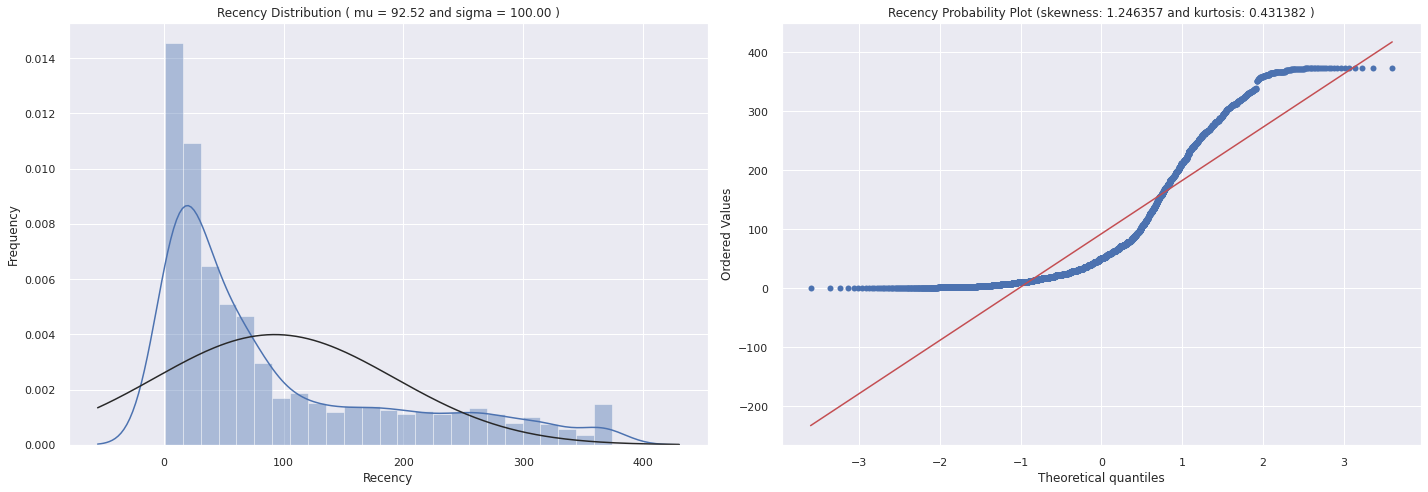

In [ ]:
# Recency 
QQ_plot(customer_history_df.Recency,'Recency')

<ipython-input-68-0340dfd4208c>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


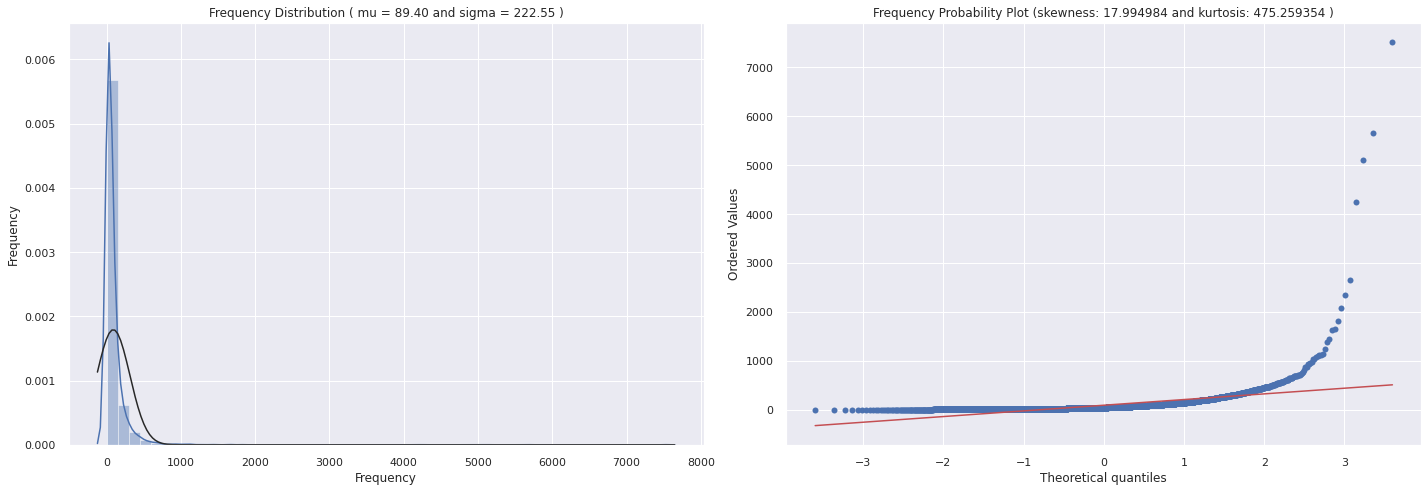

In [ ]:
#Frequency 
QQ_plot(customer_history_df.Frequency,'Frequency')

<ipython-input-68-0340dfd4208c>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, fit=norm)


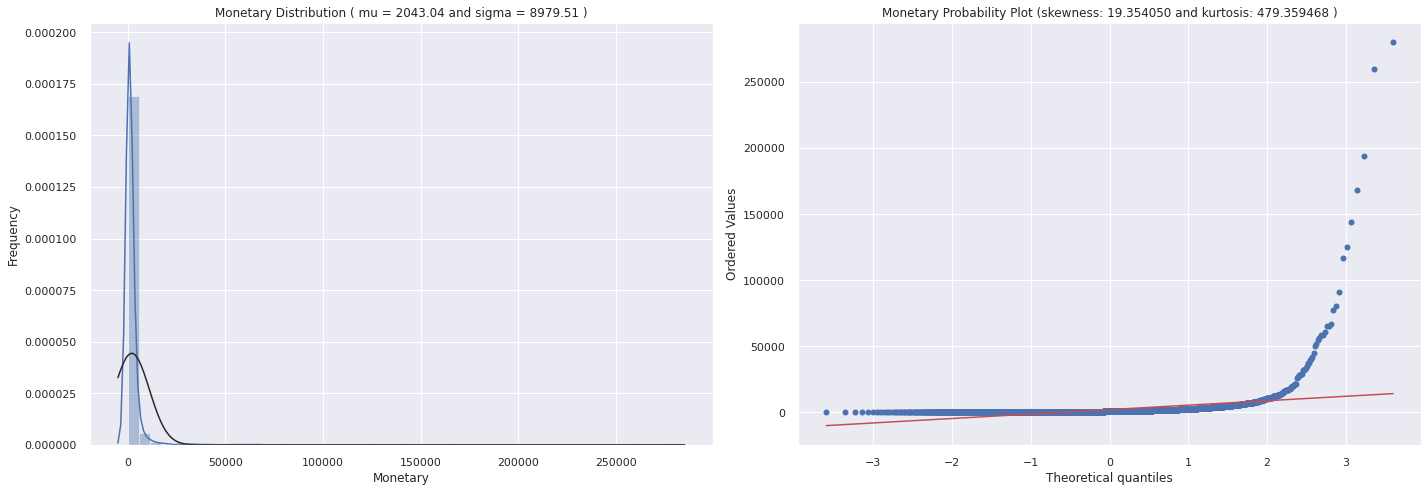

In [ ]:
#Monetary 
QQ_plot(customer_history_df.Monetary,'Monetary')

In [ ]:
customer_history_df.Monetary[customer_history_df.Monetary<=0].count()

1

In [ ]:
customer_history_df = customer_history_df[customer_history_df.Monetary != 0]

# **6. Outlier Treatment**

**Box plot**


### Checking outliers by plotting Box Plot for R-F-M (Recency, Frequency & Monetary).

/usr/local/lib/python3.9/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 0, 'Attribute - Recency')

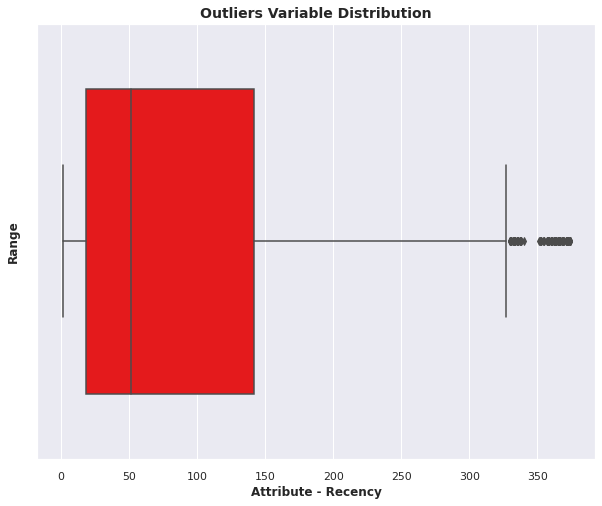

In [ ]:
# Box plot of Recency
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(x = customer_history_df['Recency'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attribute - Recency", fontweight = 'bold')

/usr/local/lib/python3.9/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 0, 'Attribute - Monetary')

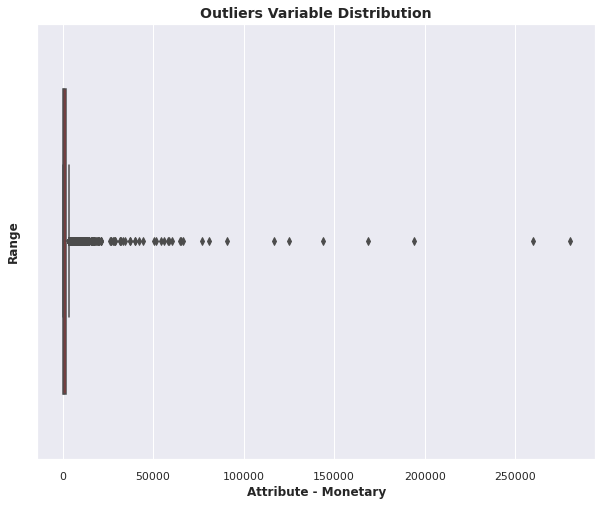

In [ ]:
# Box plot of Monetary
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(x = customer_history_df['Monetary'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attribute - Monetary", fontweight = 'bold')

/usr/local/lib/python3.9/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 0, 'Attribute - Frequency')

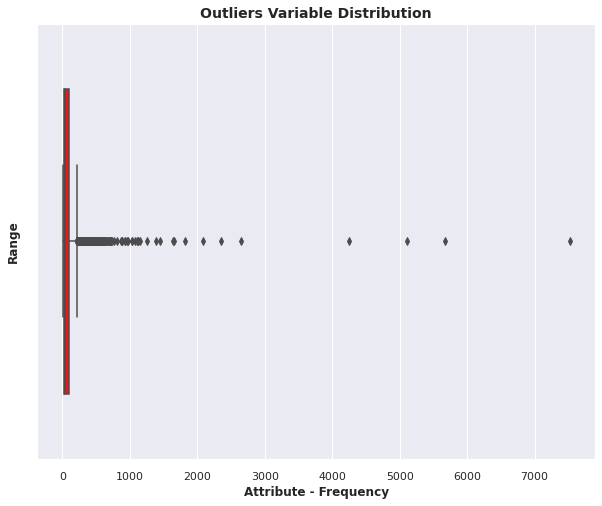

In [ ]:
# Box plot of Frequency
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(x = customer_history_df['Frequency'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attribute - Frequency", fontweight = 'bold')

**Removing Outliers by using IQR process**


In [ ]:
# removing (statistical) outliers
Q1 = customer_history_df.Monetary.quantile(0.05)
Q3 = customer_history_df.Monetary.quantile(0.95)
IQR = Q3 - Q1
customer_history_df = customer_history_df[(customer_history_df.Monetary >= Q1 - 1.5*IQR) & (customer_history_df.Monetary <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = customer_history_df.Recency.quantile(0.05)
Q3 = customer_history_df.Recency.quantile(0.95)
IQR = Q3 - Q1
customer_history_df = customer_history_df[(customer_history_df.Recency >= Q1 - 1.5*IQR) & (customer_history_df.Recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = customer_history_df.Frequency.quantile(0.05)
Q3 = customer_history_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
customer_history_df = customer_history_df[(customer_history_df.Frequency >= Q1 - 1.5*IQR) & (customer_history_df.Frequency <= Q3 + 1.5*IQR)]

In [ ]:
# Rescaling
rfm_df = customer_history_df[['Monetary', 'Frequency', 'Recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4257, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,1.665170,1.109892,-0.917855
1,0.270188,-0.453709,-0.189261
2,0.248154,-0.018800,-0.748182
3,-0.541921,-0.598679,2.156212
4,0.663685,0.105459,-0.578510


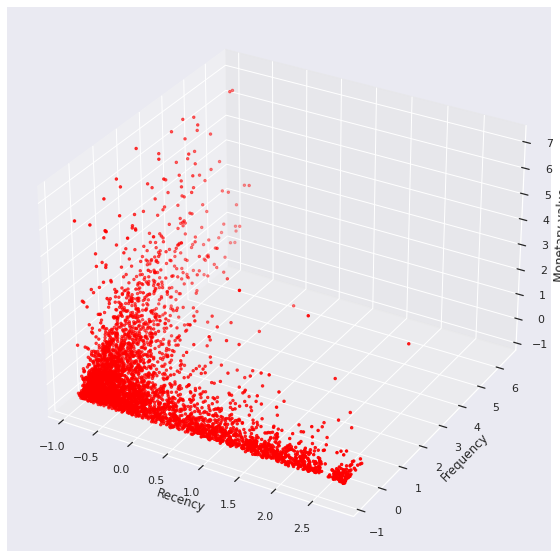

In [ ]:
# Importing Library for 3D plot
from mpl_toolkits.mplot3d import Axes3D

# set fig size
fig=plt.figure(figsize=(12,10))

# syntax for 3-D plotting
ax=fig.add_subplot(111,projection='3d')

# syntax for plotting
xs = rfm_df_scaled.Recency
ys = rfm_df_scaled.Frequency
zs = rfm_df_scaled.Monetary
ax.scatter(xs,ys,zs,s=6, color='red') 

# set x, y & z label
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')

# show the plot
plt.show()

# **7. Modelling**

## **K-Means Clustering**


**Silhouette analysis on K-Means Clustering**

Silhouette analysis can be used to study the separation distance between the resulting clusters, as a strategy to quantifying the quality of clustering via graphical tool to plot a measure of how tightly grouped the samples in the clusters are. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

Let's see below how our data perform for each K clusters groups (3, 5 and 7) in the silhouette score of each cluster, along with the center of each of the cluster discovered in the scatter plots, by amount_log vs recency_log and vs frequency_log.

**Silhouette Analysis**

**silhouette score** = (p-q)/max(p,q)

**p** is the mean distance to the points in the nearest cluster that the data point is not a part of

**q** is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

**A** score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=3))

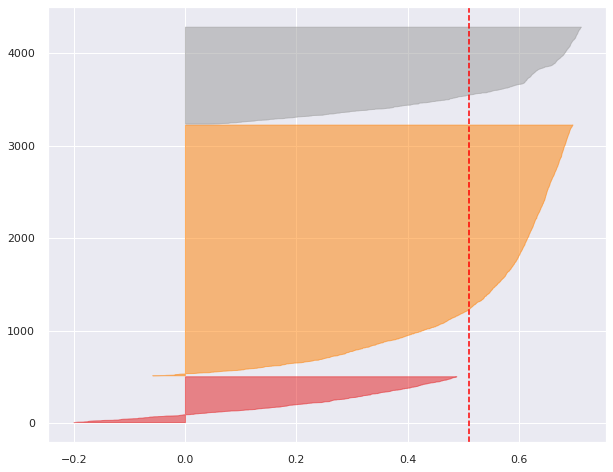

In [ ]:
silhouette_model = SilhouetteVisualizer(KMeans(3))
silhouette_model.fit(rfm_df_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=4))

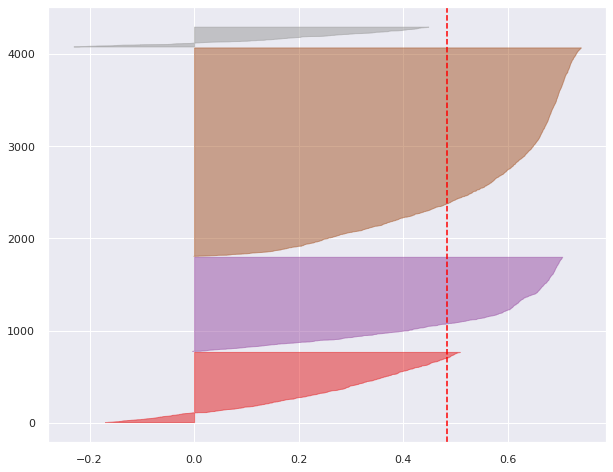

In [ ]:
silhouette_model = SilhouetteVisualizer(KMeans(4))
silhouette_model.fit(rfm_df_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=5))

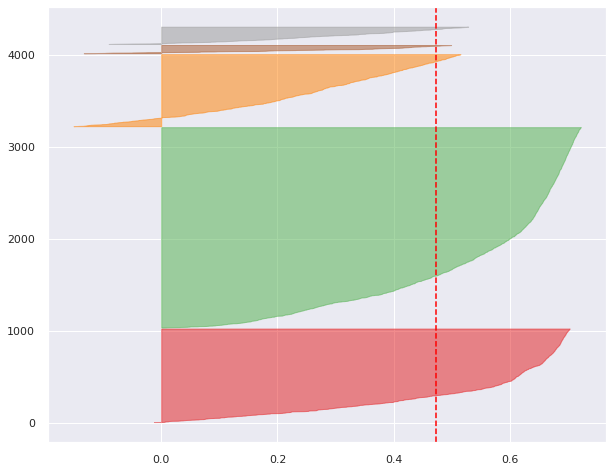

In [ ]:
silhouette_model = SilhouetteVisualizer(KMeans(5))
silhouette_model.fit(rfm_df_scaled)